# Package

Les différents modules dont nous aurons besoin sont importés. Il faut **installer le package** en cas d'erreurs 
avant l'utilisation du module.

In [9]:
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
#from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot

# Importation des données

Cette partie est dédiée à l'importation des données. La variable HOME_DIR capte le chemin ou on est entrain de 
travailler. On définit une autre variable **DATA_DIR** pour capter le chemin ou les données se trouvent.

In [36]:
#Importation des données
# Return a new path pointing to the current working directory
HOME_DIR = Path.cwd()

# create a variable for data directory
DATA_DIR = Path(HOME_DIR, "data")

print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

Work directory: C:\Users\FALLOU NGOM\Desktop\ISE2\Machine learning\projetfin 
Data directory: C:\Users\FALLOU NGOM\Desktop\ISE2\Machine learning\projetfin\data


Cette partie permet de d'importer la base de données **Automobile_data.csv** et d'afficher la dimension de la base

In [37]:
# you must put the CSV file Automobile_data.csv in data directory, cf above cell
data = pd.read_csv(Path(DATA_DIR, "Automobile_data.csv"), sep=",")
data.shape  # data frame dimensions (nb rows, nb columns)

(205, 26)

In [38]:
# Retouner les premières lignes
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [39]:
# Remplacer les "?" par "nan"
data = data.replace("?", np.nan)

In [42]:
# Information sur la base
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [100]:
# Convertir les types object qui sont des float en float
colonnes_a_convertir = ["price", "bore", "stroke", "horsepower", "peak-rpm","highway-mpg","city-mpg" ]
data[colonnes_a_convertir] = data[colonnes_a_convertir].astype(float)

In [43]:
# Generate descriptive statistics
data.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


# Exploration: Analyse exploratoire

Explorez les donénes avec les libraires, ex: missingno, plotly, seaborn, ydata-profiling, 

## Missing values

Ci-dessous, nous traçons le nombre de valeurs par colonne, en ignorant les valeurs manquantes pour l’ensemble de données. Nous avons également trié les colonnes en fonction des valeurs manquantes.

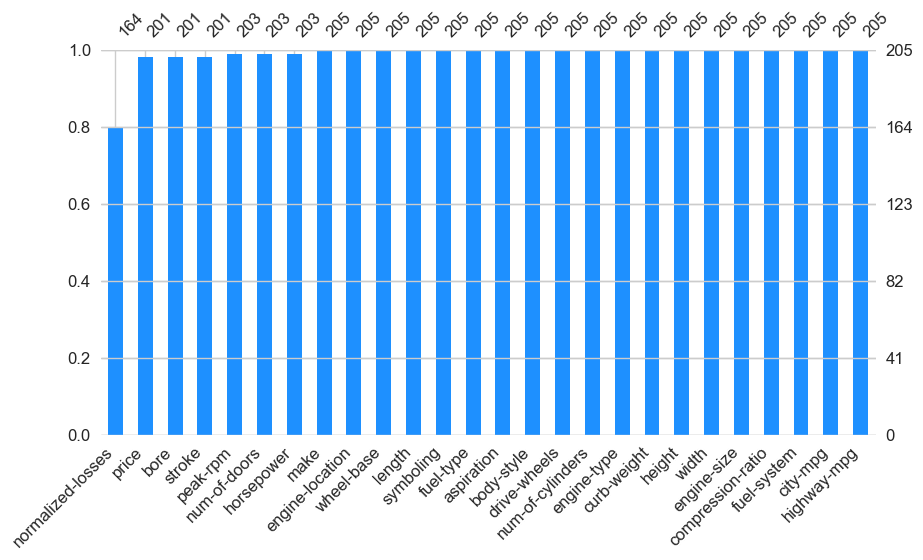

In [25]:
# Graphique en bare pour visualiser les valeurs manquantes
msno.bar(data, color="dodgerblue", sort="ascending", figsize=(10, 5), fontsize=12);

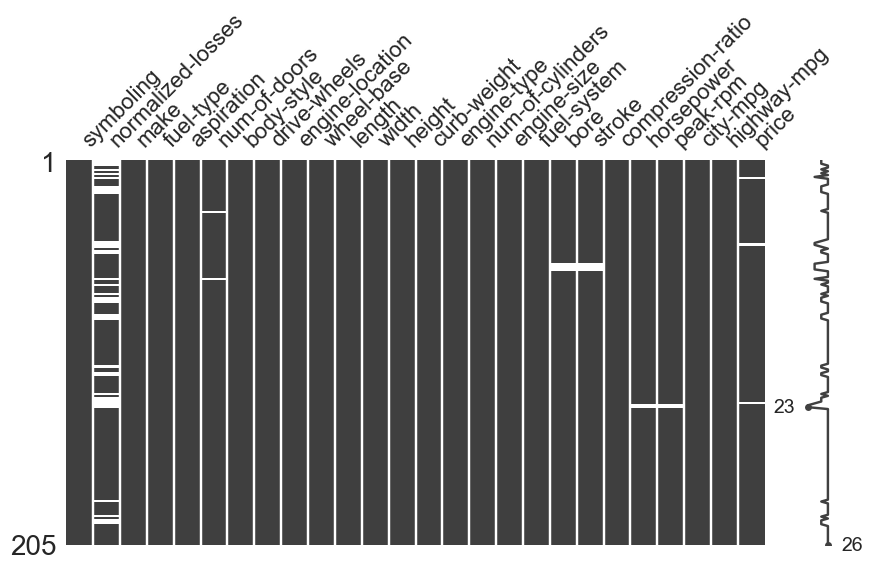

In [23]:
# Visualiser les valeurs manquantes par une matrice.

msno.matrix(data, figsize=(10, 5));

Comparaison de la distribution des prix et du log de prix. La distributtion du log de prix semble le plus suivre une
distribution normale.

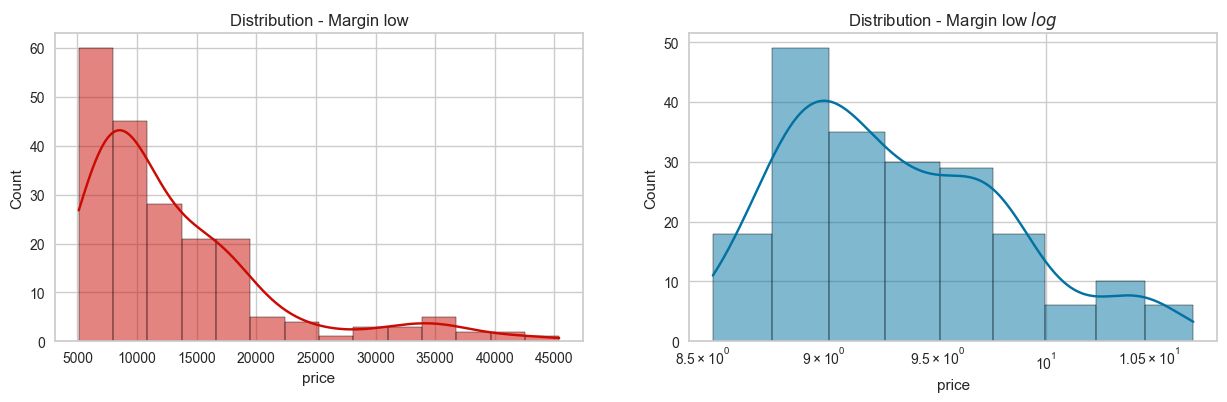

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(data["price"], color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution - Margin low')

sns.histplot(np.log(data["price"]), color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution - Margin low $log$')
axes[1].set_xscale('log');

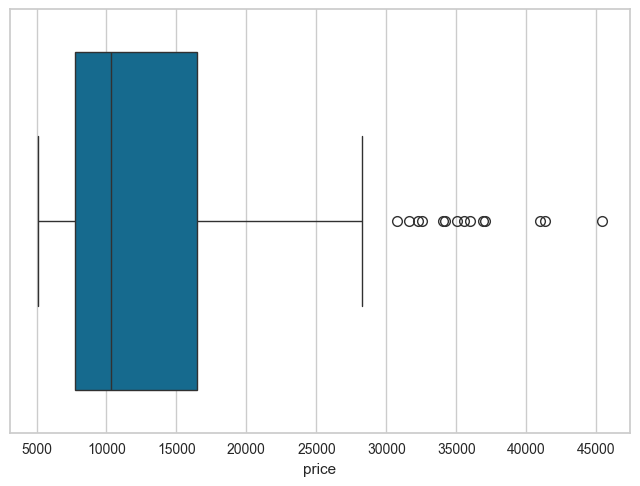

In [45]:
sns.boxplot(data["price"], orient="h");

# Corrélation des variables

In [46]:
data.select_dtypes(include=[int, float]).corr(method="pearson")

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005203,0.186170,1.000000,-0.205874,-0.436221,0.324701,0.265201,0.071107


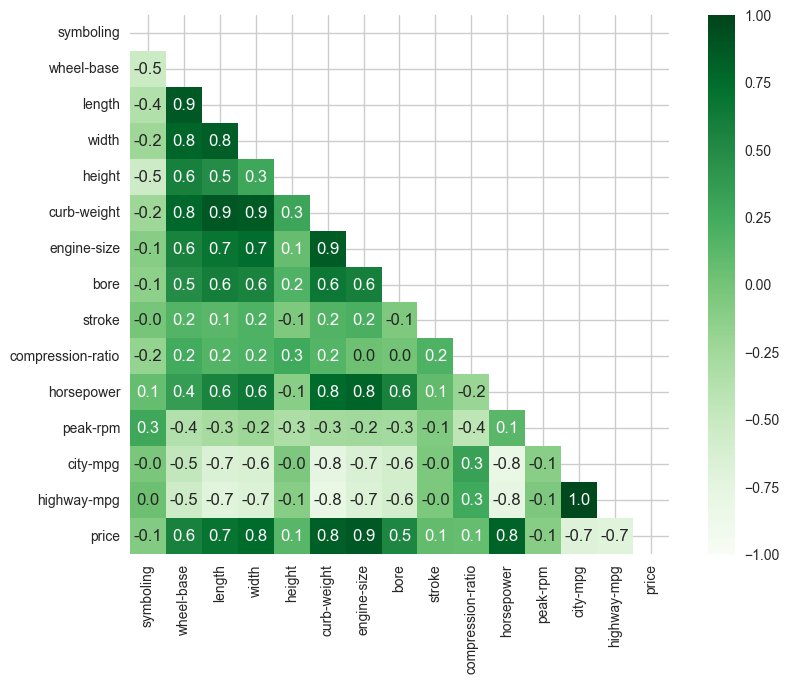

In [49]:
# correlation plot
plt.figure(figsize=(10, 7))
corr = data.select_dtypes(include=[int, float]).corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Greens', annot=True, square=True,
            fmt='.1f',# Limiter les décimales à 1 chiffres
            mask=mask,
            cbar=True, vmin=-1, vmax=1);

# Modeling

In [50]:
from sklearn import linear_model

import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad

In [51]:
data_model = data.loc[lambda dfr: dfr.price.notnull()]

data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [87]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data_model.loc[:, [ "wheel-base","length","width","height","curb-weight","engine-size","bore","stroke","compression-ratio","horsepower","peak-rpm",
                       "city-mpg","highway-mpg"
                      ]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'price']

## Train / Test split

In [88]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 20% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (160, 13) ; y: (160,) 
Test set - X: (41, 13) ; y: (41,)


In [89]:
# Supprimer les lignes avec NaN
X_train = X_train.dropna()
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]
y_train = y_train.loc[X_train.index]  # Mettre à jour y_train pour correspondre aux index de X_train

In [90]:
# Standardisons les données :

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [91]:
X_train

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23
39,96.5,175.4,65.2,54.1,2304,110,3.15,3.58,9.0,86.0,5800.0,27,33
25,93.7,157.3,63.8,50.6,1989,90,2.97,3.23,9.4,68.0,5500.0,31,38
125,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143.0,5500.0,19,27
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,114.2,198.9,68.4,58.7,3230,120,3.46,3.19,8.4,97.0,5000.0,19,24
15,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182.0,5400.0,16,22
95,94.5,165.6,63.8,53.3,2028,97,3.15,3.29,9.4,69.0,5200.0,31,37
183,97.3,171.7,65.5,55.7,2209,109,3.19,3.40,9.0,85.0,5250.0,27,34


In [70]:
X_train_std

array([[ 1.71735187,  1.21326697,  1.5243216 , ...,  0.82791705,
        -1.18900275, -1.18355821],
       [-0.39566281,  0.11063483, -0.29049766, ...,  1.46955276,
         0.24087556,  0.31156422],
       [-0.86522163, -1.37874143, -0.97718603, ...,  0.82791705,
         0.87637702,  1.05912544],
       ...,
       [-0.73106197, -0.69576778, -0.97718603, ...,  0.18628134,
         0.87637702,  0.9096132 ],
       [-0.26150315, -0.1938233 , -0.14335015, ...,  0.29322062,
         0.24087556,  0.46107647],
       [-1.26770062, -0.27610928,  1.03382991, ...,  0.18628134,
        -1.34787811, -1.18355821]])

## Linear regression

In [92]:
# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train, y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
lr_error = np.mean((lr.predict(X_test) - y_test) ** 2)

# On obtient l'erreur quadratique ci-dessous
print(lr_error)

24355115.51642008


In [93]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

Intercept: -50625.65982682249
Coefficients: [ 1.61395870e+02 -5.61200360e+01  5.83011698e+02  1.28908369e+02
  2.59329463e-01  1.06570883e+02 -1.18643862e+03 -2.38787778e+03
  1.75684667e+02  3.18081635e+01  1.01902035e+00 -3.03620489e+02
  2.23220820e+02]


In [97]:
# Instanciation:
data_model = data_model.rename(columns={
    'wheel-base': 'wheel_base',
    'curb-weight': 'curb_weight',
    'engine-size': 'engine_size',
    'compression-ratio': 'compression_ratio',
    'peak-rpm': 'peak_rpm',
    'city-mpg': 'city_mpg',
    'highway-mpg': 'highway_mpg'
})

## Validation du modèle

In [99]:

reg_lin = smf.ols("price ~ wheel_base + length + width + height + curb_weight + engine_size + bore + stroke + compression_ratio + horsepower + peak_rpm + city_mpg + highway_mpg", data=data_model)

# Calculs:
res_lin = reg_lin.fit()
res_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     83.37
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           4.06e-69
Time:                        20:22:55   Log-Likelihood:                -1840.5
No. Observations:                 195   AIC:                             3709.
Df Residuals:                     181   BIC:                             3755.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.207e+04   1.62e+04     -3.836      0.000    -9.4e+04   -3.01e+04
wheel_base           70.4671    103.127      0.683      0.495    -133.019     273.953
length              -89.7337     57.014     -1.574      0.117    -202.230      22.763
width               620.8463    256.362      2.422      0.016     115.004    1126.688
height              319.9388    141.954      2.254      0.025      39.840     600.037
curb_weight           1.7125      1.729      0.990      0.323      -1.700       5.125
engine_size         126.6748     15.058      8.412      0.000      96.963     156.387
bore               -918.7109   1206.844     -0.761      0.447   -3300.004    1462.582
stroke            -2962.9726    793.685     -3.733      0.000   -4529.037   -1396.908
compression_ratio   239.7248     85.314      2.810      0.006      71.386     408.063
horsepower           38.0153     18.105      2.100      0.037       2.290      73.740
peak_rpm              2.0856      0.673      3.099      0.002       0.758       3.413
city_mpg           -308.0351    181.910     -1.693      0.092    -666.973      50.902
highway_mpg         283.9561    163.947      1.732      0.085     -39.536     607.448
==============================================================================
Omnibus:                       21.735   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.476
Skew:                           0.151   Prob(JB):                     8.30e-21
Kurtosis:                       6.360   Cond. No.                     4.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""